# Neural Networks

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Tutorial 5

$\newcommand{\trace}[1]{\operatorname{tr}\left\{#1\right\}}$
$\newcommand{\Norm}[1]{\lVert#1\rVert}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\inner}[2]{\langle #1, #2 \rangle}$
$\newcommand{\DD}{\mathscr{D}}$
$\newcommand{\grad}[1]{\operatorname{grad}#1}$
$\DeclareMathOperator*{\argmin}{arg\,min}$

Setting up the environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## The data set

We will use an old dataset on the price of housing in Boston (see [description](https://archive.ics.uci.edu/ml/datasets/Housing)). The aim is to predict the median value of the owner occupied homes from various other factors. This is the same data as was used in Tutorial 2. However, this time we will explore data normalisation, and hence use the raw data instead. Please download this from [mldata.org](http://mldata.org/repository/data/download/csv/regression-datasets-housing/).

As in Tutorial 2, use ```pandas``` to read the data. Remove the 'CHAS' feature from the dataset. 

In [2]:
names =  ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
data = pd.read_csv('regression-datasets-housing.csv', header=None, names=names)
data.drop('chas', axis=1, inplace=True)
data.shape

(506, 13)

Implement a function that will normalise each feature such that the mean value of the feature is zero and the variance is one. Apply this function to each feature in the housing dataset.

In [3]:
# Solution

def normalise_z(data):
    """Returns data that is Z normalised.
    Each feature has zero mean and unit variance.
    """
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    print(mu)
    print(sigma)
    assert np.any(sigma > 0.0), 'Zero variance'
    return (data-mu)/sigma

n_data = normalise_z(data)

crim         3.613524
zn          11.347826
indus       11.136779
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.083004
b          356.674032
lstat       12.653063
medv        22.532806
dtype: float64
crim         8.593041
zn          23.287547
indus        6.853571
nox          0.115763
rm           0.701923
age         28.121033
dis          2.103628
rad          8.698651
tax        168.370495
ptratio      2.278319
b           91.204607
lstat        7.134002
medv         9.188012
dtype: float64


To simplify equations, we introduce an extra input so that the biases can be absorbed into the weights.

In [4]:
num_ex = len(n_data.index)
n_data['ones'] = np.ones(num_ex)
n_data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,ones
0,-0.419782,0.285654,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.353192,0.441052,-1.075562,0.159686,1
1,-0.417339,-0.487292,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.475352,0.441052,-0.492439,-0.101524,1
2,-0.417342,-0.487292,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.475352,0.396427,-1.208727,1.324247,1
3,-0.416750,-0.487292,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,-0.036432,0.416163,-1.361517,1.182758,1
4,-0.412482,-0.487292,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,-0.036432,0.441052,-1.026501,1.487503,1


## Comparing two normalisations

Compare the normalised data ```n_data``` to the data from Tutorial 2 by plotting and/or comparing histograms. Discuss the potential effect of the normalisation on the regression task.

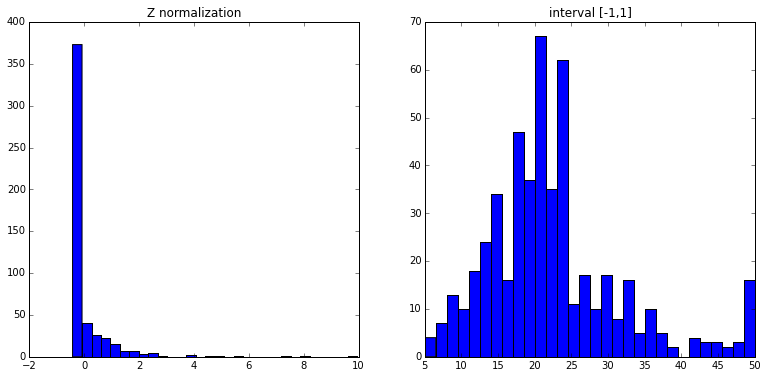

In [5]:
# Solution

data2 = pd.read_csv('housing_scale.csv', header=None, names=names)
fig = plt.figure(figsize=(13,6))
ax1 = fig.add_subplot(121)
ax1.hist(n_data['crim'], bins=30)
ax1.set_title('Z normalization')
ax2 = fig.add_subplot(122)
ax2.hist(data2['crim'], bins=30)
ax2.set_title('interval [-1,1]')

# Note that this is an open ended question.

## Error Backpropagation

Note that we are considering a regression problem. That is we want to predict the median value of homes (a real number) from the other features. We use the squared error to measure performance.
$$
E = \frac{1}{2} \sum_k (y_k - t_k)^2
$$

### Objective function
Write down the objective function of a neural network with one hidden layer. Use the identity activation function for the hidden units. Write down the equation for 5 hidden units.

How many input units should there be? What should be the activation function of the output units? Explain why these choices are reasonable.

### Solution

Using notation from lecture slides:
$$
y_k(x,w) = g\left(\sum_{j=0}^M w_{kj}^{(2)} h \left( \sum_{i=0}^D w_{ji}^{(1)} x_i\right)\right).
$$

Since we are considering regression, $g(\cdot)$ is the identity. 
We assume $h(\cdot)$ is also the identity, simplifying matters.
There should be 12 input units, one for each feature, and one output unit.
$$
y_1(x,w) = \sum_{j=0}^4 w_{kj}^{(2)} \left( \sum_{i=0}^{11} w_{ji}^{(1)} x_i\right).
$$

We consider the squared error, hence the objective function of the neural network is (where $t$ is the label):
\begin{align}
E &= \frac{1}{2} \left(y_1(x,w) - t\right)^2\\
&= \frac{1}{2} \left(\sum_{j=0}^4 w_{kj}^{(2)} \left( \sum_{i=0}^{11} w_{ji}^{(1)} x_i\right) - t\right)^2
\end{align}

### Gradient
Compute the gradient
$\frac{\partial E}{\partial w^{(2)}}$

### Solution
$$
\frac{\partial E}{\partial w_{kj}^{(2)}} = 
\left(\sum_{j=0}^4 w_{kj}^{(2)} \left( \sum_{i=0}^{11} w_{ji}^{(1)} x_i\right) - t\right)\left( \sum_{i=0}^{11} w_{ji}^{(1)} x_i\right)
$$

## Checking correctness

One strategy to check that your code is correct in neural networks (and in general any gradient code) is to numerically check that your expression is correct. From the lecture we see that:
$$
\frac{\partial E}{\partial w^{(2)}} \simeq \frac{E(w^{(2)} + \epsilon) - E(w^{(2)} - \epsilon)}{2\epsilon}.
$$
For more information see [the following wiki](http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization).

Implement two functions, one that computes the analytic gradient and the second that computes the numerical gradient.

In [6]:
# Solution

def grad_analytic(Wout, Whid, x_i, t):
    """Returns the gradient of the output layer, based on analytic formula."""
    hid = np.dot(Whid, x_i)
    grad = (np.dot(Wout, hid) - t)*hid
    return grad

def objective(Wout, Whid, x_i, t):
    """Returns the objective value of the neural network"""
    hid = np.dot(Whid, x_i)
    obj = 0.5*(np.dot(Wout, hid) - t)**2
    return obj

def grad_numerical(Wout, Whid, x_i, t):
    """Returns the gradient of the output layer, based on numerical gradient"""
    num_hidden = len(Wout)
    grad = np.zeros(num_hidden)
    for idx in range(num_hidden):
        epsilon = 0.01
        Wout_plus = Wout.copy()
        Wout_plus[idx] += epsilon
        Wout_minus = Wout.copy()
        Wout_minus[idx] -= epsilon
        grad[idx] = objective(Wout_plus, Whid, x_i, t) - objective(Wout_minus, Whid, x_i, t)
        grad[idx] /= 2.*epsilon
    return grad

Using the Boston housing data above, confirm that the two functions return almost the same values of the gradient for various values of $w$.

In [7]:
# Solution
    
# Easiest test to debug is to use a deterministic function
Wout = np.array([1,2,3,4,5], dtype=float)
Whid = np.ones((5,13))
sample_idx = 1
x_i = np.array(n_data.iloc[sample_idx])[1:]
print(objective(Wout, Whid, x_i, n_data['medv'][sample_idx]))
print(grad_analytic(Wout, Whid, x_i, n_data['medv'][sample_idx]))
print(grad_numerical(Wout, Whid, x_i, n_data['medv'][sample_idx]))
    

534.175027073
[ 71.44456259  71.44456259  71.44456259  71.44456259  71.44456259]
[ 71.44456259  71.44456259  71.44456259  71.44456259  71.44456259]


## (optional) Gradients for hidden layer

Derive and implement the gradients for the hidden layer, hence giving you the full two layer neural network. Use this with the experimental set up in Tutorial 2 to analyse the Boston housing data. Recall that since we are using linear activation functions, this is equivalent to using a linear model. Compare and contrast the results of the neural network with regularised linear regression.